## EXPIREMENT 8 
## Ananya Goel


# DECISION TREE AND CLUSTERING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('ifood_df.csv')
data.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0


In [3]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [4]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value = pd.DataFrame({'column': data.columns,'percent_missing': percent_missing})
missing_value.sort_values('percent_missing', ascending=False)
missing_value.head()

,column,percent_missing
Income,Income,0.0
Kidhome,Kidhome,0.0
Teenhome,Teenhome,0.0
Recency,Recency,0.0
MntWines,MntWines,0.0


NO MISSING VALUES

In [5]:
d_type = data.dtypes
d_type

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [6]:
data.AcceptedCmpOverall.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [7]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [8]:
colList =[]
for col in data.columns :
    if(data[col].nunique() <=5):
        colList.append(col)
colList

['Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD',
 'AcceptedCmpOverall']

In [9]:
data = data[colList]
data

,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,...,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,AcceptedCmpOverall
0,0,0,0,0,0,0,0,0,3,11,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0,0,3,11,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,3,11,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,3,11,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,3,11,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0,1,0,0,0,0,0,0,3,11,...,1,0,0,0,0,0,1,0,0,0
2201,2,1,0,0,0,1,0,0,3,11,...,0,0,1,0,0,0,0,0,1,1
2202,0,0,0,1,0,0,0,0,3,11,...,0,0,0,0,0,0,1,0,0,1
2203,0,1,0,0,0,0,0,0,3,11,...,0,0,1,0,0,0,0,1,0,0


<AxesSubplot:xlabel='Kidhome', ylabel='AcceptedCmpOverall'>

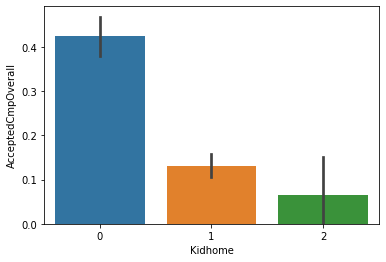

In [10]:
sns.barplot(x=data.Kidhome , y=data.AcceptedCmpOverall)

<AxesSubplot:xlabel='Complain', ylabel='AcceptedCmpOverall'>

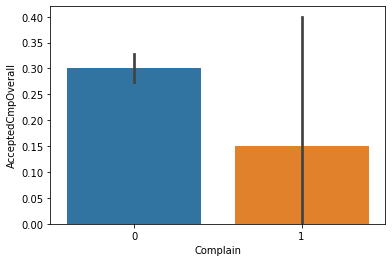

In [11]:
sns.barplot(x=data.Complain , y=data.AcceptedCmpOverall)   

In [12]:
features = data.drop(columns=['Response'])
label = data['Response']

In [13]:
label.unique()

array([1, 0], dtype=int64)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.30, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1543, 21)
(662, 21)
(1543,)
(662,)


# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred = model.predict(x_test)
y_pred[0:20]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

### Accuracy

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print('Training Accuracy : ' , accuracy_score(y_train,model.predict(x_train))*100)
print('Testing Accuracy : ' , accuracy_score(y_test,y_pred)*100)

Training Accuracy :  90.99157485418017
Testing Accuracy :  87.16012084592145


# K means Clustering

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_train)

KMeans(n_clusters=2)

In [20]:
y_pred = kmeans.predict(x_test)
y_pred[0:20]

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0])

In [21]:
kmeans.cluster_centers_[0:20]

array([[ 4.93388430e-01,  5.33884298e-01, -3.88578059e-16,
        -8.32667268e-17,  1.66533454e-16, -1.94289029e-16,
         6.59194921e-17,  1.32231405e-02,  3.00000000e+00,
         1.10000000e+01,  9.42148760e-02,  3.87603306e-01,
         2.26446281e-01,  2.61157025e-01,  3.05785124e-02,
         8.42975207e-02,  2.56198347e-02,  5.19008264e-01,
         1.58677686e-01,  2.12396694e-01, -3.33066907e-16],
       [ 2.43243243e-01,  4.17417417e-01,  3.48348348e-01,
         3.60360360e-01,  3.51351351e-01,  3.15315315e-01,
         6.60660661e-02,  6.00600601e-03,  3.00000000e+00,
         1.10000000e+01,  9.90990991e-02,  4.05405405e-01,
         1.98198198e-01,  2.49249249e-01,  4.80480480e-02,
         7.20720721e-02,  1.20120120e-02,  5.01501502e-01,
         1.50150150e-01,  2.64264264e-01,  1.44144144e+00]])

In [22]:
print('Training Accuracy : ' , accuracy_score(y_train,kmeans.predict(x_train))*100)
print('Testing Accuracy : ' , accuracy_score(y_test,y_pred)*100)

Training Accuracy :  80.62216461438756
Testing Accuracy :  82.17522658610272


# Agglomerative Clustering 

In [23]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()
model.fit(x_train)

AgglomerativeClustering()

In [24]:
y_pred = model.fit_predict(x_test)
y_pred[0:20]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [25]:
print('Training Accuracy : ' , accuracy_score(y_train,model.fit_predict(x_train))*100)
print('Testing Accuracy : ' , accuracy_score(y_test,y_pred)*100)

Training Accuracy :  81.3350615683733
Testing Accuracy :  82.02416918429003
